# Exploratory Data Analysis

In [73]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 50)
#from tqdm import tqdm

### Read data

In [74]:
# unzip files in the directory
import gzip
import os

directory = '/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest'

# Get all files in the directory
files = os.listdir(directory)

# Unzip files ending with .gz
for file in files:
    if file.endswith('.gz'):
        file_path = os.path.join(directory, file)
        output_path = os.path.splitext(file_path)[0]  # Remove .gz extension
        with gzip.open(file_path, 'rb') as f_in:
            with open(output_path, 'wb') as f_out:
                f_out.write(f_in.read())

In [75]:
#load the files
def load_files(file_paths):
    """
    Load CSV files into pandas DataFrames.

    Parameters:
        file_paths (dict): A dictionary containing file labels as keys and file paths as values.

    Returns:
        dict: A dictionary containing file labels as keys and corresponding DataFrames as values.
    """
    dataframes = {}
    for label, path in file_paths.items():
        try:
            dataframes[label] = pd.read_csv(path)
        except FileNotFoundError:
            print(f"Error: File not found at {path}")
        except Exception as e:
            print(f"Error loading {label}: {e}")
    return dataframes

# Define file paths
file_paths = {
    "patients": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/patients.csv",
    "conditions": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/conditions.csv",
    "encounters": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/encounters.csv",
    "medications": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/medications.csv",
    "observations": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/observations.csv",
    "dictionary_loinc" :"/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/dictionary_loinc.csv",
    "dictionary_rxnorm": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/dictionary_rxnorm.csv",
    "dictionary_snomed": "/Users/s1348311/Library/Mobile Documents/com~apple~CloudDocs/Documents/interview questions/ucl/test_data/data/dest/dictionary_snomed.csv"
}

# Load the files
dataframes = load_files(file_paths)

# Access individual DataFrames
patients_df = dataframes["patients"]
conditions_df = dataframes["conditions"]
encounters_df = dataframes["encounters"]
medications_df = dataframes["medications"]
observations_df = dataframes["observations"]
dictionary_loinc_df = dataframes["dictionary_loinc"]
dictionary_rxnorm_df = dataframes["dictionary_rxnorm"]
dictionary_snomed_df = dataframes["dictionary_snomed"]


In [76]:
unique_ids = patients_df['Id'].unique()
print('Number of unique patients:', len(unique_ids))

Number of unique patients: 1162


In [77]:
# sort smomed dictionary
merged_conditions_df = conditions_df.merge(dictionary_snomed_df, on='CODE')
merged_conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2013-06-24,2013-07-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002.0,Acute bronchitis (disorder)
1,2016-02-27,2016-03-14,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005.0,Laceration of forearm
2,2016-08-11,2016-08-22,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,36d2e781-4655-0a11-1f70-c69856e02019,444814009.0,Viral sinusitis (disorder)
3,2016-11-27,2016-12-17,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009.0,Viral sinusitis (disorder)
4,2017-02-22,2017-06-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001.0,Fracture of ankle


In [78]:
# function to convert the df type as CODE columns for both dataset are of different type

def clean_and_merge_medications(medications_df, dictionary_rxnorm_df):
    """
    Cleans and merges the medications and dictionary DataFrames on the 'CODE' column.
    Handles invalid 'CODE' values and ensures data types match.

    Parameters:
    - medications_df (pd.DataFrame): DataFrame containing medication data with a 'CODE' column.
    - dictionary_rxnorm_df (pd.DataFrame): DataFrame containing dictionary data with a 'CODE' column.

    Returns:
    - pd.DataFrame: Merged DataFrame with valid 'CODE' values.
    """
    # Ensure CODE columns are strings
    medications_df['CODE'] = medications_df['CODE'].astype(str)
    dictionary_rxnorm_df['CODE'] = dictionary_rxnorm_df['CODE'].astype(str)
    
    # Remove invalid CODE values (non-numeric strings)
    medications_df = medications_df[medications_df['CODE'].str.match(r'^\d+(\.\d+)?$', na=False)]
    dictionary_rxnorm_df = dictionary_rxnorm_df[dictionary_rxnorm_df['CODE'].str.match(r'^\d+(\.\d+)?$', na=False)]
    
    # Convert CODE columns to float for merging
    medications_df['CODE'] = medications_df['CODE'].astype(float)
    dictionary_rxnorm_df['CODE'] = dictionary_rxnorm_df['CODE'].astype(float)
    
    # Merge the DataFrames
    merged_medications_df = medications_df.merge(dictionary_rxnorm_df, on='CODE', how='inner')
    
    # Return the merged DataFrame
    return merged_medications_df

# use the function
merged_medications_df = clean_and_merge_medications(medications_df, dictionary_rxnorm_df)

# Display the first few rows of the merged DataFrame
merged_medications_df.head()


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,DESCRIPTION
0,2020-02-17T10:40:32Z,NaN,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,01efcc52-15d6-51e9-faa2-bee069fcbe44,1014676.0,21.45,0.0,21,450.45,NaN,cetirizine hydrochloride 5 MG Oral Tablet
1,2020-02-17T10:40:32Z,NaN,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,01efcc52-15d6-51e9-faa2-bee069fcbe44,1870230.0,231.58,0.0,21,4863.18,NaN,NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Inje...
2,2013-06-24T06:39:19Z,2013-07-02T06:39:19Z,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,1043400.0,7.59,0.0,1,7.59,10509002.0,Acetaminophen 21.7 MG/ML / Dextromethorphan Hy...
3,2016-02-27T08:52:29Z,2016-03-14T08:52:29Z,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,6e2f1a2d-27bd-3701-8d08-dae202c58632,a6d818dd-0983-fd1c-eefa-3d2295532c45,198405.0,12.48,0.0,1,12.48,NaN,Ibuprofen 100 MG Oral Tablet
4,2017-02-22T09:25:31Z,2017-06-02T09:25:31Z,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,047f6ec3-6215-35eb-9608-f9dda363a44c,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,313820.0,4.77,0.0,3,14.31,NaN,Acetaminophen 160 MG Chewable Tablet


In [79]:
# merge dictionary_loinc_df with observations_df on 'CODE' column
merged_observations_df = observations_df.merge(dictionary_loinc_df, on='CODE')
merged_observations_df.head()

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,VALUE,UNITS,TYPE,DESCRIPTION
0,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,8302-2,51.4,cm,numeric,Body Height
1,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,72514-3,1.0,{score},numeric,Pain severity - 0-10 verbal numeric rating [Sc...
2,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,29463-7,3.8,kg,numeric,Body Weight
3,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,77606-2,57.9,%,numeric,Weight-for-length Per age and sex
4,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,9843-4,34.8,cm,numeric,Head Occipital-frontal circumference


## Question 1a

#### Quality control check. Investigate why there are missing data and the reason behind the missingness. There is no age in this dataset, so calculate age in Jan 2025 if patients are still alive. Make sure the birthdate is before deathdate. Remove unecessary info such as the non-categorised variables such as zip, address, LAT and LON as we have other geographic info. Drop name details too


In [80]:
from datetime import datetime

def clean_and_calculate_age(df):
    """
    Cleans the input DataFrame by:
    - Removing rows where BIRTHDATE is null.
    - Ensuring DEATHDATE is not before BIRTHDATE.
    - Calculating the AGE column based on BIRTHDATE and DEATHDATE.
      If DEATHDATE is missing, today's date is used.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing 'BIRTHDATE' and 'DEATHDATE' columns.

    Returns:
    - pd.DataFrame: Cleaned DataFrame with an additional 'AGE' column.
    """
    # Ensure BIRTHDATE and DEATHDATE are datetime objects
    df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], errors='coerce')
    df['DEATHDATE'] = pd.to_datetime(df['DEATHDATE'], errors='coerce')
    
    # Remove rows where BIRTHDATE is null
    df = df[df['BIRTHDATE'].notna()]
    
    # Remove rows where DEATHDATE is before BIRTHDATE
    df = df[(df['DEATHDATE'].isna()) | (df['DEATHDATE'] >= df['BIRTHDATE'])]
    
    # Calculate age: use DEATHDATE if available, otherwise use today's date
    today = datetime.now()
    def calculate_age(row):
        reference_date = row['DEATHDATE'] if pd.notna(row['DEATHDATE']) else today
        age = reference_date.year - row['BIRTHDATE'].year
        # Adjust if the birthday hasn't occurred yet this year
        if (reference_date.month, reference_date.day) < (row['BIRTHDATE'].month, row['BIRTHDATE'].day):
            age -= 1
        return age
    
    df['AGE'] = df.apply(calculate_age, axis=1)
    
    return df


# Call the function
patients_df = clean_and_calculate_age(patients_df)
patients_df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17,NaT,999-65-3251,NaN,NaN,NaN,Damon455,Langosh790,NaN,...,620 Lynch Tunnel Apt 0,Springfield,Massachusetts,Hampden County,1104.0,42.080389,-72.480431,9039.1645,7964.1255,5
1,339144f8-50e1-633e-a013-f361391c4cff,1998-05-11,NaT,999-10-8743,S99996708,X75063318X,Mr.,Chi716,Greenfelder433,NaN,...,1060 Bernhard Crossroad Suite 15,Boston,Massachusetts,Suffolk County,2131.0,42.292557,-71.061160,571935.8725,787.5375,26
3,217f95a3-4e10-bd5d-fb67-0cfb5e8ba075,1993-12-23,NaT,999-91-4320,S99991143,X44132498X,Mr.,Jerrold404,Herzog843,NaN,...,276 Bernier Branch,Revere,Massachusetts,Suffolk County,NaN,42.381875,-70.999286,475826.8550,18067.0950,31
4,faac724a-a9e9-be66-fe1e-3044dc0ba8ea,2020-12-04,NaT,999-31-8261,NaN,NaN,NaN,Brandon214,Watsica258,NaN,...,734 Brakus Pathway Unit 28,New Marlborough,Massachusetts,Berkshire County,NaN,42.147028,-73.217103,31468.0400,206.2200,4
5,23d16ee3-8cd4-eeb8-e77e-1e5fbf4c4159,1990-12-15,NaT,999-60-9905,S99950633,X36202735X,Mr.,Rodrigo242,Arellano2,NaN,...,538 Crona Underpass,Revere,Massachusetts,Suffolk County,2151.0,42.443262,-71.022322,772362.7250,2213.0850,34


In [81]:
#drop unnecessary columns
patients_df= patients_df.drop(['BIRTHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'ADDRESS', 'LAT', 'LON', 'ZIP'], axis=1)
patients_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 0 to 1161
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1152 non-null   object        
 1   DEATHDATE            157 non-null    datetime64[ns]
 2   RACE                 1152 non-null   object        
 3   ETHNICITY            1152 non-null   object        
 4   GENDER               1132 non-null   object        
 5   BIRTHPLACE           1152 non-null   object        
 6   CITY                 1152 non-null   object        
 7   STATE                1152 non-null   object        
 8   COUNTY               1152 non-null   object        
 9   HEALTHCARE_EXPENSES  1152 non-null   float64       
 10  HEALTHCARE_COVERAGE  1152 non-null   float64       
 11  AGE                  1152 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 117.0+ KB


### description of patient's population

In [82]:
#install ydata-profiling if you haven't already
#!pip install ydata-profiling

In [83]:
import pandas as pd

def clean_race_column(df, race_column='RACE', non_real_races=None):
    """
    Cleans and standardizes the RACE column, removing rows with non-real race values.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the race column.
    - race_column (str): The name of the column to clean (default: 'RACE').
    - non_real_races (list): List of non-real race values to remove (default: ['XJNIDSE', '???-']).
    
    Returns:
    - pd.DataFrame: Cleaned DataFrame with standardized race values.
    - pd.Series: Value counts of races after cleaning.
    """
    if non_real_races is None:
        non_real_races = ['XJNIDSE', '???-']
    
    # Inspect unique values in the RACE column
    print(f"Unique values in '{race_column}' before cleaning:")
    print(df[race_column].apply(repr).unique())
    
    # Standardize the RACE column (strip whitespace and convert to uppercase)
    df[race_column] = df[race_column].str.strip().str.upper()
    
    # Remove rows with non-real race values
    df_cleaned = df[~df[race_column].isin(non_real_races)]
    
    # Count occurrences of each race after cleaning
    race_counts_cleaned = df_cleaned[race_column].value_counts()
    
    print("\nRace counts after cleaning:")
    print(race_counts_cleaned)
    
    return df_cleaned, race_counts_cleaned

# Call the function
patients_df, race_counts = clean_race_column(patients_df)



Unique values in 'RACE' before cleaning:
["'white'" "'black'" "'asian'" "'hawaiian'" "'XJniDSe'" "'???-'" "'other'"
 "'native'"]

Race counts after cleaning:
RACE
WHITE       935
BLACK        95
ASIAN        72
HAWAIIAN     16
OTHER        11
NATIVE        2
Name: count, dtype: int64


In [84]:
#print the count of each unique value in the ETHNICITY column
# ETHNICITY looks fine, no need modification
count_ETHNICITY= patients_df['ETHNICITY'].value_counts()
count_ETHNICITY

ETHNICITY
nonhispanic    1026
hispanic        105
Name: count, dtype: int64

In [85]:
import pandas as pd

def clean_gender_column(df, gender_column='GENDER'):
    """
    Cleans the gender column by:
    - Removing rows where the gender value is missing (NaN).
    - Standardizing the gender values (strip spaces, convert to uppercase).
    - Keeping only rows with gender values 'M' or 'F'.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing a gender column.
    - gender_column (str): The name of the gender column (default: 'GENDER').

    Returns:
    - pd.DataFrame: Cleaned DataFrame with valid gender values.
    """
    # Remove rows with missing gender
    df_cleaned = df[df[gender_column].notna()]
    
    # Standardize the gender column: strip spaces and convert to uppercase
    df_cleaned[gender_column] = df_cleaned[gender_column].str.strip().str.upper()
    
    # Keep only rows with 'M' or 'F'
    df_cleaned = df_cleaned[df_cleaned[gender_column].isin(['M', 'F'])]
    
    return df_cleaned

# Call the function
patients_df = clean_gender_column(patients_df)


In [86]:
#print the count of each unique value in the county column
# county looks fine, no need modification
count_gender= patients_df['GENDER'].value_counts()
count_gender

GENDER
F    581
M    526
Name: count, dtype: int64

In [87]:
patients_df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [88]:
import pandas as pd

def mark_death_status(df, deathdate_column='DEATHDATE', status_column='IS_DEAD'):
    """
    Adds a new column to indicate death status:
    - 1 if the DEATHDATE column has a value (not null).
    - 0 if the DEATHDATE column is null.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing a death date column.
    - deathdate_column (str): The name of the death date column (default: 'DEATHDATE').
    - status_column (str): The name of the new status column to be added (default: 'IS_DEAD').

    Returns:
    - pd.DataFrame: DataFrame with the new status column added.
    """
    # Create the status column: 1 if DEATHDATE is not null, otherwise 0
    df[status_column] = df[deathdate_column].notna().astype(int)
    return df

# Call the function
cleaned_gender_df= mark_death_status(patients_df)


In [89]:
#print the count of each unique value in the county column
# county looks fine, no need modification
count_county= patients_df['COUNTY'].value_counts()
count_county

COUNTY
Middlesex County     228
Suffolk County       129
Essex County         124
Norfolk County       122
Worcester County     108
Bristol County       104
Plymouth County       92
Hampden County        75
Barnstable County     54
Hampshire County      31
Franklin County       21
Berkshire County      18
Nantucket County       1
Name: count, dtype: int64

In [90]:
#print the CITY of each unique value in the county column
# city looks fine, no need modification
count_city= patients_df['CITY'].value_counts()
count_city

CITY
Boston            109
Springfield        29
Somerville         22
Worcester          22
Quincy             22
                 ... 
Hopedale            1
Wayland             1
Chesterfield        1
Raynham Center      1
Gardner             1
Name: count, Length: 251, dtype: int64

In [91]:
#print the BIRTHPLACE of each unique value in the county column
# BIRTHPLACE looks fine, no need modification
count_BIRTHPLACE= patients_df['BIRTHPLACE'].value_counts()
count_BIRTHPLACE

BIRTHPLACE
Boston  Massachusetts  US             107
Worcester  Massachusetts  US           26
Lowell  Massachusetts  US              23
Cambridge  Massachusetts  US           20
Quincy  Massachusetts  US              17
                                     ... 
Shelburne Falls  Massachusetts  US      1
Amesbury  Massachusetts  US             1
Wilbraham  Massachusetts  US            1
Barre  Massachusetts  US                1
Wellfleet  Massachusetts  US            1
Name: count, Length: 309, dtype: int64

In [92]:
#print the STATE  of each unique value in the county column
# STATE  looks fine, no need modification. Since eveyone is in the sam state, we can remove this column
count_STATE = patients_df['STATE'].value_counts()
count_STATE 

STATE
Massachusetts    1107
Name: count, dtype: int64

In [93]:
# drop columns that we don't need such as STATE and DEATHDATE
final_patient_df = patients_df.drop(['STATE', 'DEATHDATE'], axis=1)

In [94]:
#convert is dead column to object
final_patient_df['IS_DEAD'] = hypertension_patients['IS_DEAD'].astype(str)

In [95]:
from ydata_profiling import ProfileReport

profile_df = final_patient_df.drop(['Id'], axis=1) 
profile = ProfileReport(profile_df, title="Patient Population Demography")
profile.to_file('Patient_Population_Demography.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


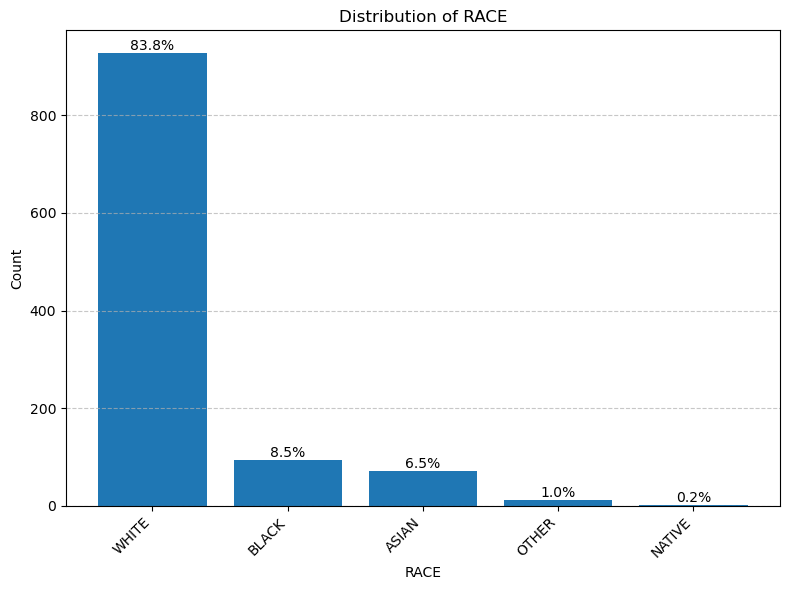

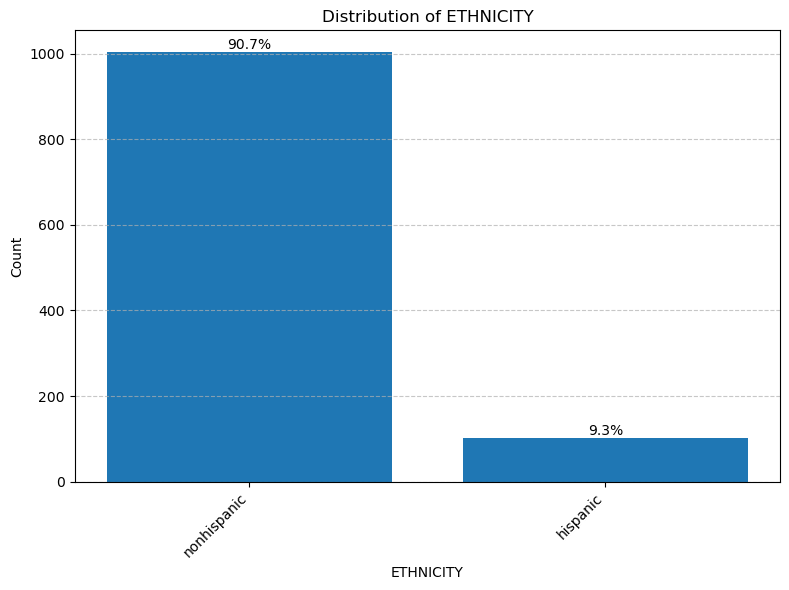

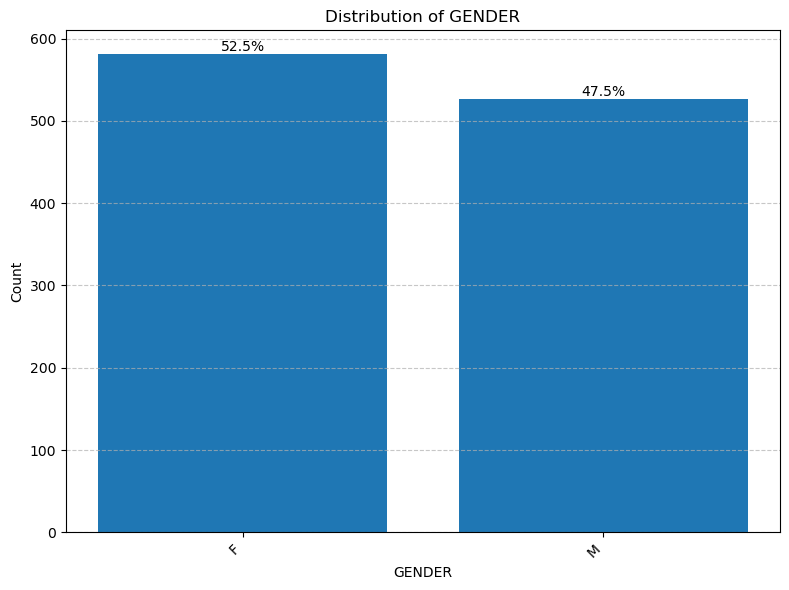

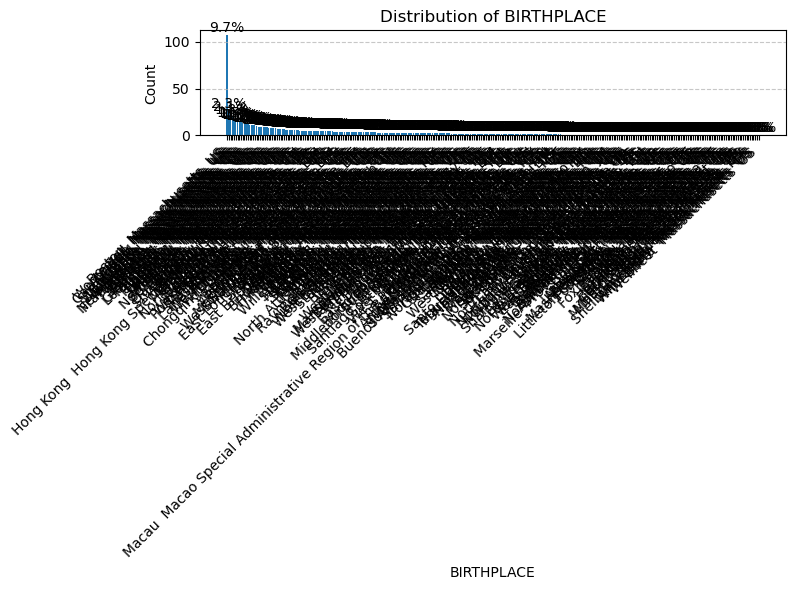

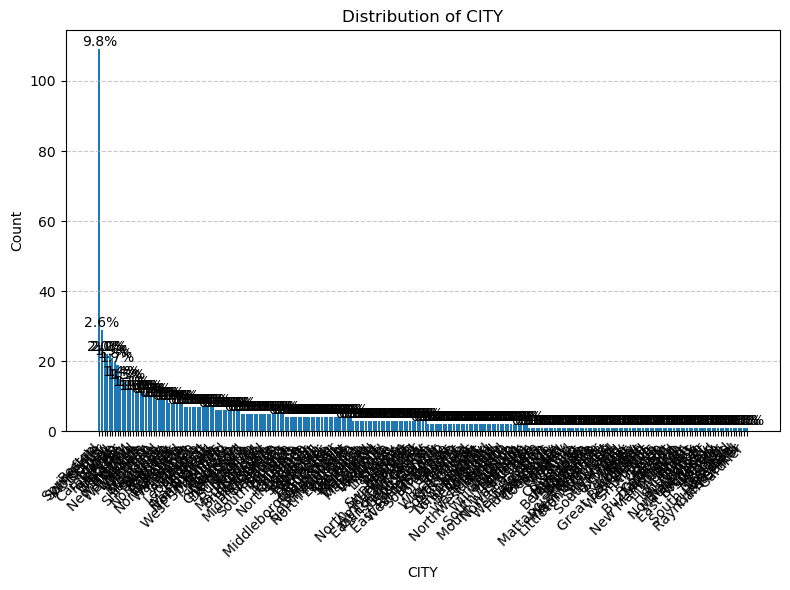

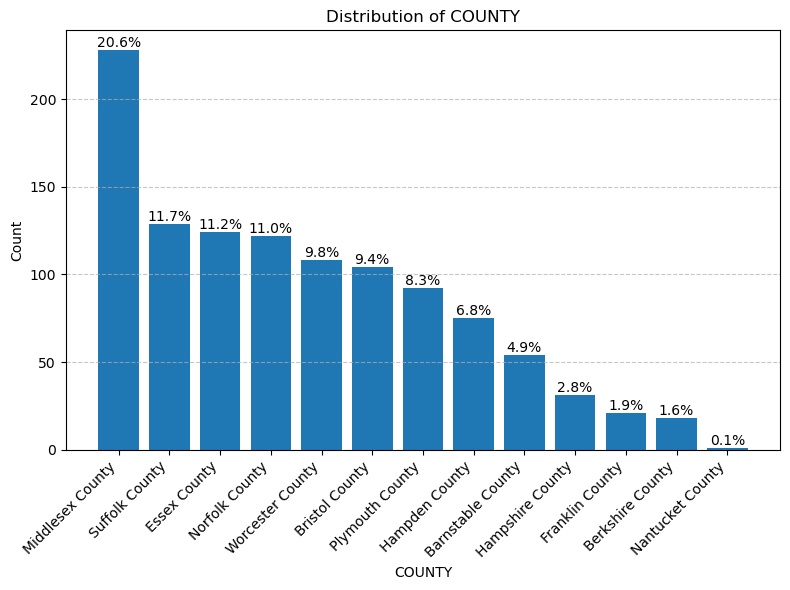

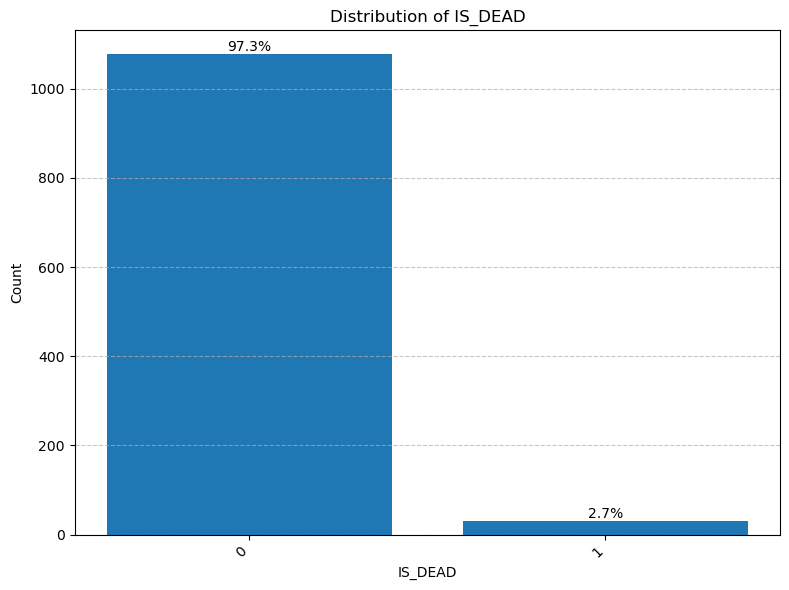

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_categorical_distributions_with_percentages(df, title_prefix='Distribution of'):
    """
    Plots bar charts for all categorical variables in the DataFrame with percentages displayed on top of the bars.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - title_prefix (str): Prefix for the title of each chart (default: 'Distribution of').

    Returns:
    - None: Displays the bar charts.
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Plot bar charts for each categorical column
    for column in categorical_columns:
        plt.figure(figsize=(8, 6))
        
        # Calculate value counts and percentages
        value_counts = df[column].value_counts(normalize=True) * 100
        value_counts_abs = df[column].value_counts()
        
        # Plot the bar chart
        bars = plt.bar(value_counts.index, value_counts_abs)
        
        # Add percentage labels on top of each bar
        for bar, percentage in zip(bars, value_counts):
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2, height,
                f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10
            )
        
        # Customize plot
        plt.title(f"{title_prefix} {column}")
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()



plot_categorical_distributions_with_percentages(profile_df)


##### seems like poeple were born at different places and there are many city in the data, we can drop them as they might not be relevant for this study

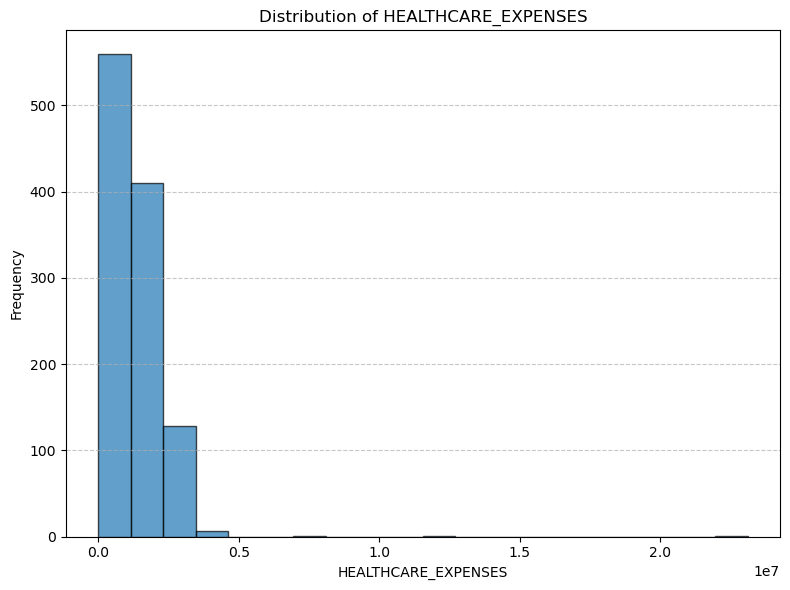

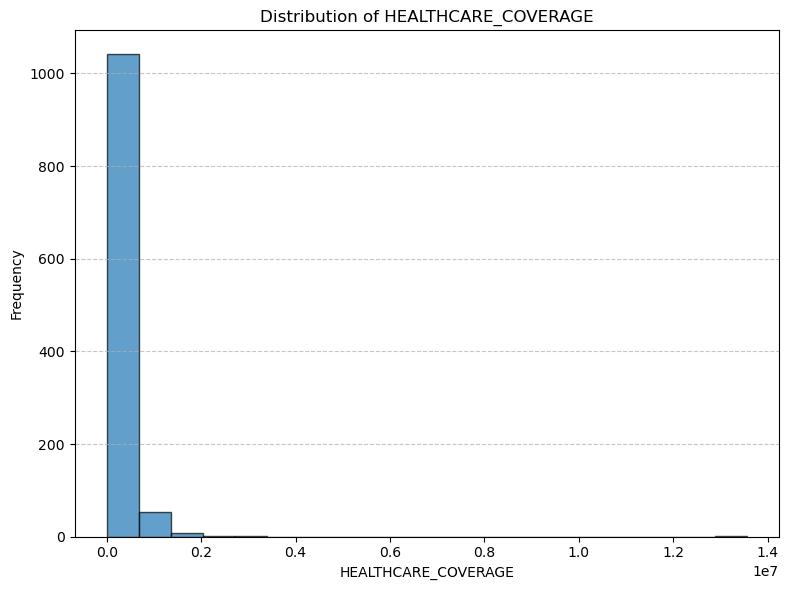

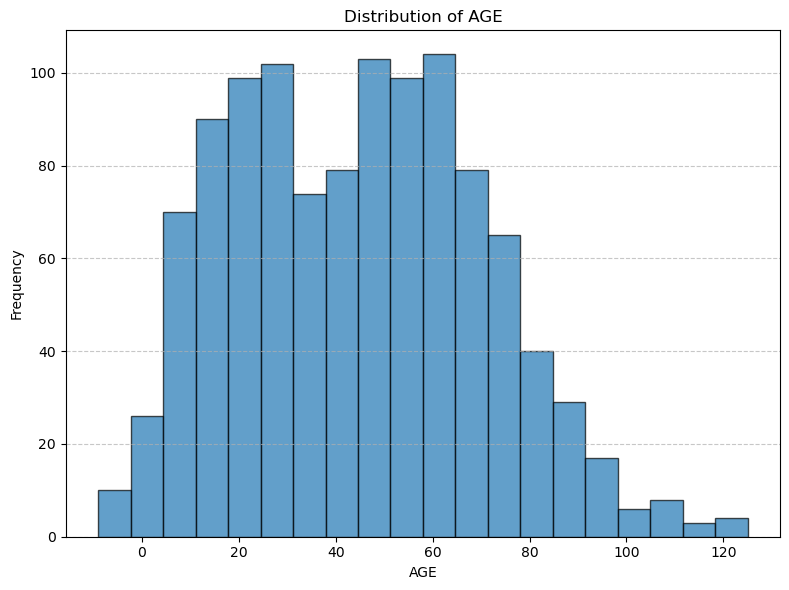

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms_for_numerical(df, title_prefix='Distribution of'):
    """
    Plots histograms for all numerical variables in the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - title_prefix (str): Prefix for the title of each histogram (default: 'Distribution of').

    Returns:
    - None: Displays the histograms.
    """
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Plot histograms for each numerical column
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        
        # Plot histogram
        plt.hist(df[column].dropna(), bins=20, edgecolor='black', alpha=0.7)
        
        # Customize plot
        plt.title(f"{title_prefix} {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


plot_histograms_for_numerical(profile_df)


### Question 2

### combine all datasets

In [98]:
#rename 'PATIENT' column to 'Id' to match the patient dataframe
merged_observations_df.rename(columns={'PATIENT': 'Id'}, inplace=True)
merged_conditions_df.rename(columns={'PATIENT': 'Id'}, inplace=True)
merged_medications_df.rename(columns={'PATIENT': 'Id'}, inplace=True)

In [99]:
#number of unique patients data = 1107
final_patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 0 to 1161
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1107 non-null   object 
 1   RACE                 1107 non-null   object 
 2   ETHNICITY            1107 non-null   object 
 3   GENDER               1107 non-null   object 
 4   BIRTHPLACE           1107 non-null   object 
 5   CITY                 1107 non-null   object 
 6   COUNTY               1107 non-null   object 
 7   HEALTHCARE_EXPENSES  1107 non-null   float64
 8   HEALTHCARE_COVERAGE  1107 non-null   float64
 9   AGE                  1107 non-null   int64  
 10  IS_DEAD              1107 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 136.1+ KB


In [100]:
def merge_patient_with_datasets(patient_df, observations_df, medications_df, conditions_df, id_column='Id', join_type='inner'):
    """
    Merges the patient DataFrame with observations, medications, and conditions DataFrames.

    Parameters:
    - patient_df (pd.DataFrame): The patient DataFrame.
    - observations_df (pd.DataFrame): The observations DataFrame.
    - medications_df (pd.DataFrame): The medications DataFrame.
    - conditions_df (pd.DataFrame): The conditions DataFrame.
    - id_column (str): The column name representing the patient ID (default: 'Id').
    - join_type (str): The type of join to use for merging (default: 'inner').

    Returns:
    - dict: A dictionary containing the merged DataFrames:
      - 'merged_patient_observation': Merged patient and observations DataFrame.
      - 'merged_patient_medication': Merged patient and medications DataFrame.
      - 'merged_patient_condition': Merged patient and conditions DataFrame.
    """
    # Merge patient DataFrame with observations
    merged_patient_observation_df = patient_df.merge(observations_df, on=id_column, how=join_type)

    # Merge patient DataFrame with medications
    merged_patient_medication_df = patient_df.merge(medications_df, on=id_column, how=join_type)

    # Merge patient DataFrame with conditions
    merged_patient_condition_df = patient_df.merge(conditions_df, on=id_column, how=join_type)

    # Return the merged DataFrames in a dictionary
    return {
        'merged_patient_observation': merged_patient_observation_df,
        'merged_patient_medication': merged_patient_medication_df,
        'merged_patient_condition': merged_patient_condition_df
    }

# Call the function to merge datasets
merged_data = merge_patient_with_datasets(final_patient_df, merged_observations_df, merged_medications_df, merged_conditions_df)



In [101]:
# Count the number of unique 'Id' for each merged dataset
for key, df in merged_data.items():
    unique_patients = df['Id'].nunique()  # Count unique 'Id'
    print(f"Number of unique patients in {key}: {unique_patients}")
    

Number of unique patients in merged_patient_observation: 1107
Number of unique patients in merged_patient_medication: 1064
Number of unique patients in merged_patient_condition: 1091


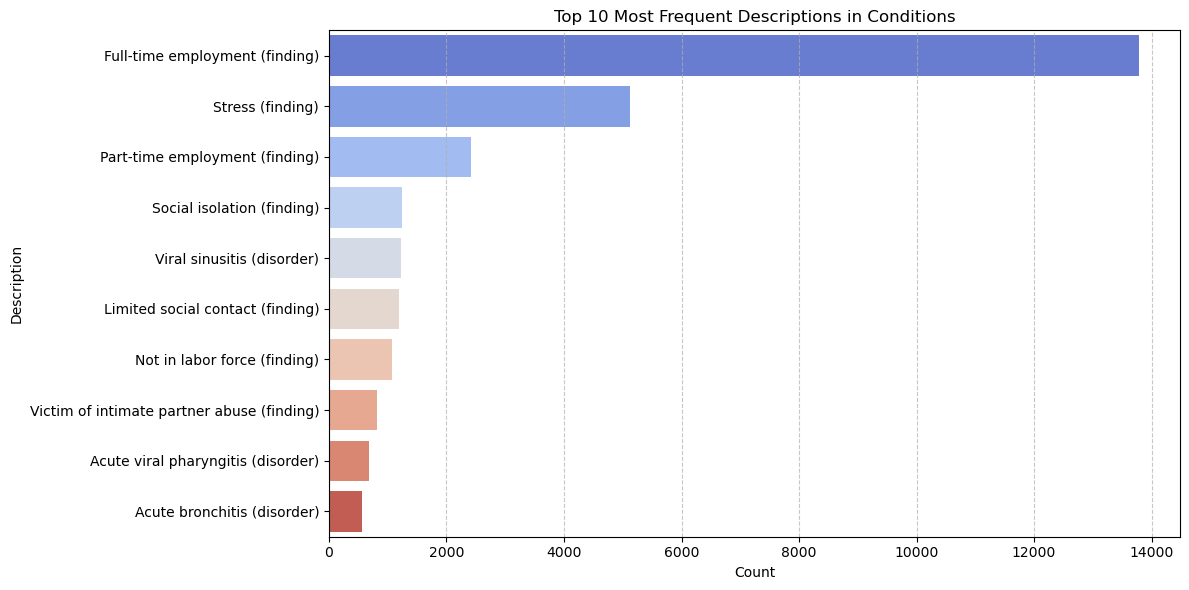

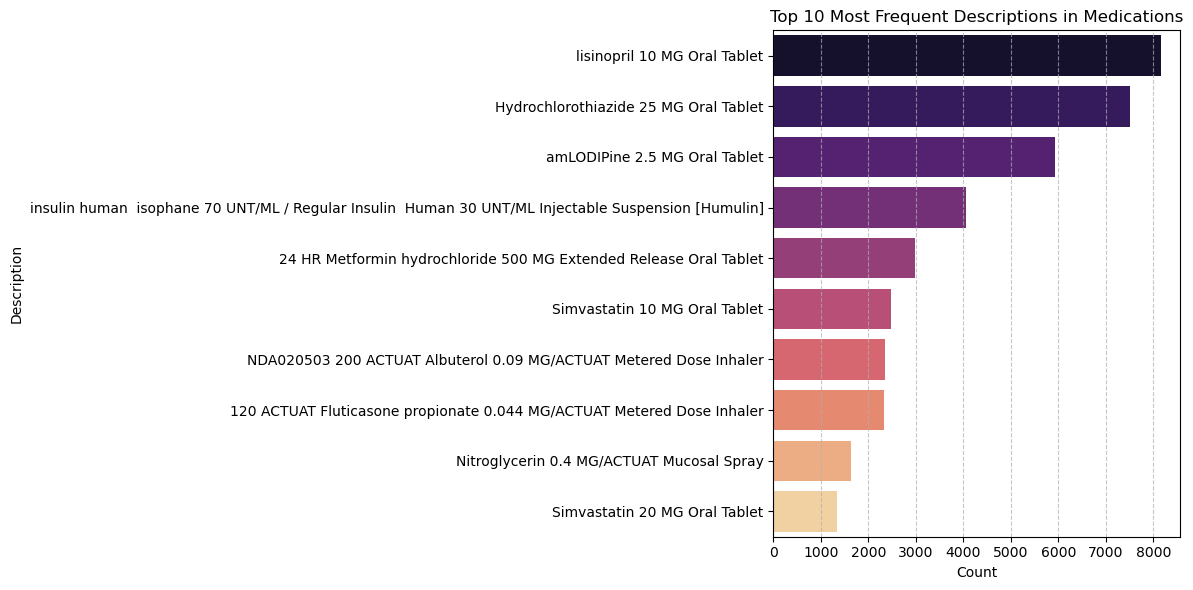

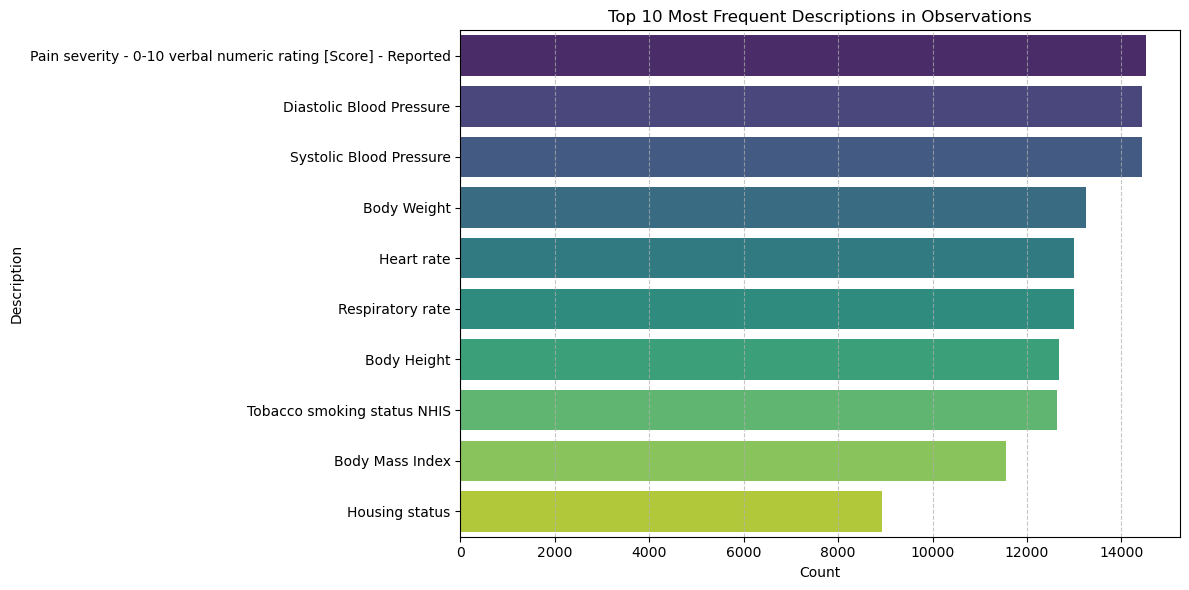

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_10_descriptions(df, title, description_column='DESCRIPTION', top_n=10, palette='viridis'):
    """
    Plots a bar chart for the top N unique values in the specified description column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - title (str): The title of the plot.
    - description_column (str): The column containing the descriptions (default: 'DESCRIPTION').
    - top_n (int): Number of top unique values to display (default: 10).
    - palette (str): Color palette for the bar chart (default: 'viridis').

    Returns:
    - None: Displays the bar chart.
    """
    # Count unique values in the specified description column
    count_description = df[description_column].value_counts()

    # Get the top N most frequent values
    top_descriptions = count_description.head(top_n)

    # Plot the distribution for the top N values
    plt.figure(figsize=(12, 6))
    sns.barplot(y=top_descriptions.index, x=top_descriptions.values, palette=palette)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Description')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_top_10_descriptions(
    df=merged_conditions_df,
    title='Top 10 Most Frequent Descriptions in Conditions',
    description_column='DESCRIPTION',
    top_n=10,
    palette='coolwarm'
)

plot_top_10_descriptions(
    df=merged_medications_df,
    title='Top 10 Most Frequent Descriptions in Medications',
    description_column='DESCRIPTION',
    top_n=10,
    palette='magma'
)

plot_top_10_descriptions(
    df=merged_observations_df,
    title='Top 10 Most Frequent Descriptions in Observations',
    description_column='DESCRIPTION',
    top_n=10,
    palette='viridis'
)


In [103]:
# select patients with hypterension 
hypertension_patients = merged_conditions_df[merged_conditions_df['DESCRIPTION'] == 'Hypertension']
hypertension_patients.head()


,START,STOP,Id,ENCOUNTER,CODE,DESCRIPTION
15,2016-07-04,NaN,339144f8-50e1-633e-a013-f361391c4cff,8195411f-4a65-9245-07d3-1999e1c223df,59621000.0,Hypertension
241,2020-08-06,NaN,961f61f8-ed32-f113-8450-192064b49aa9,12b5326b-b733-ca19-73e4-7829ff401b2d,59621000.0,Hypertension
249,2003-05-18,NaN,9acc871f-b577-5530-b8ad-fa95b58cea25,f5a6fe5e-c618-c3e2-b7a6-e5688db13f1a,59621000.0,Hypertension
639,2013-11-29,NaN,2f031d4a-b070-ce15-6372-30c8fecf1164,b6162a1a-3875-fce5-979a-3e92ae99502e,59621000.0,Hypertension
717,1993-03-19,NaN,f0660412-c40e-4d5c-5b11-08b6da289331,a9e9384d-e825-a12b-38bc-65f24a777dd6,59621000.0,Hypertension


In [104]:
# Filter BMI, Diastolic Blood Pressure, and Systolic Blood Pressure from merged_observations_df
filtered_observations = merged_observations_df[
    merged_observations_df['DESCRIPTION'].isin(
        ['Body Mass Index', 'Diastolic Blood Pressure', 'Systolic Blood Pressure']
    )
][['Id', 'DESCRIPTION','VALUE',	'UNITS']]

# Display the first few rows of the filtered DataFrame
filtered_observations.head()



,Id,DESCRIPTION,VALUE,UNITS
5,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,Diastolic Blood Pressure,89.0,mm[Hg]
6,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,Systolic Blood Pressure,115.0,mm[Hg]
30,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,Diastolic Blood Pressure,71.0,mm[Hg]
31,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,Systolic Blood Pressure,115.0,mm[Hg]
40,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,Diastolic Blood Pressure,77.0,mm[Hg]


In [105]:
#merge the filtered observations with the hypertension patients
hypertension_data = hypertension_patients.merge(filtered_observations, on='Id', how='inner')
hypertension_data.head()

,START,STOP,Id,ENCOUNTER,CODE,DESCRIPTION_x,DESCRIPTION_y,VALUE,UNITS
0,2016-07-04,NaN,339144f8-50e1-633e-a013-f361391c4cff,8195411f-4a65-9245-07d3-1999e1c223df,59621000.0,Hypertension,Body Mass Index,25.5,kg/m2
1,2016-07-04,NaN,339144f8-50e1-633e-a013-f361391c4cff,8195411f-4a65-9245-07d3-1999e1c223df,59621000.0,Hypertension,Diastolic Blood Pressure,82.0,mm[Hg]
2,2016-07-04,NaN,339144f8-50e1-633e-a013-f361391c4cff,8195411f-4a65-9245-07d3-1999e1c223df,59621000.0,Hypertension,Systolic Blood Pressure,129.0,mm[Hg]
3,2016-07-04,NaN,339144f8-50e1-633e-a013-f361391c4cff,8195411f-4a65-9245-07d3-1999e1c223df,59621000.0,Hypertension,Body Mass Index,26.7,kg/m2
4,2016-07-04,NaN,339144f8-50e1-633e-a013-f361391c4cff,8195411f-4a65-9245-07d3-1999e1c223df,59621000.0,Hypertension,Diastolic Blood Pressure,85.0,mm[Hg]


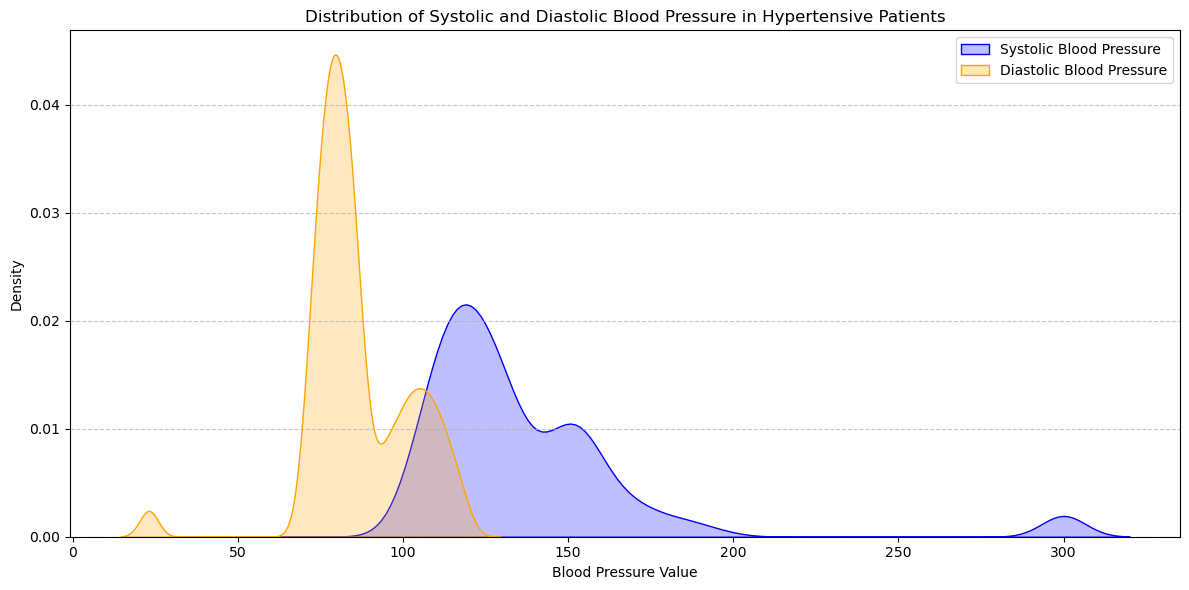

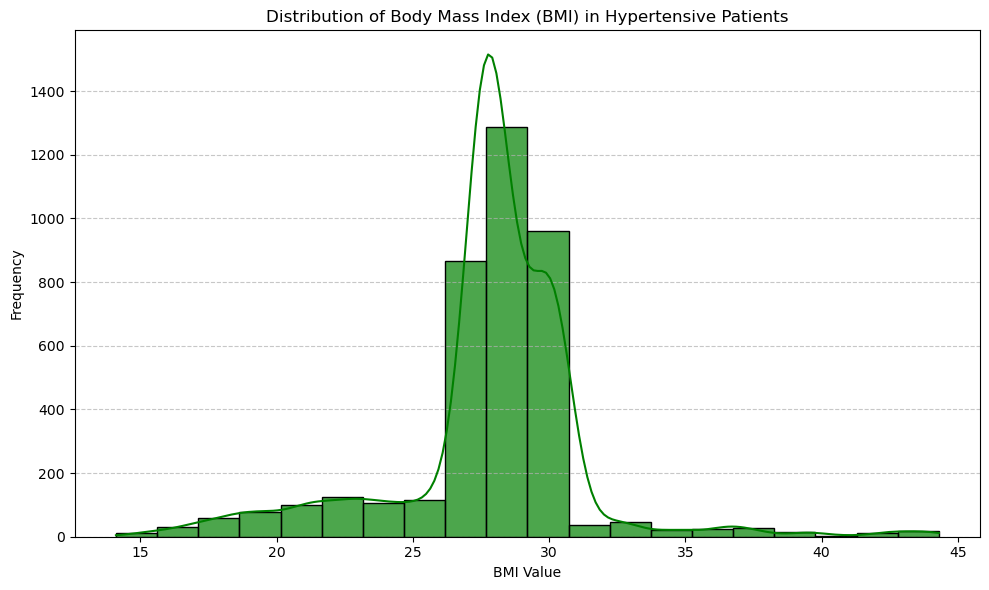

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'VALUE' is numeric
systolic_bp['VALUE'] = pd.to_numeric(systolic_bp['VALUE'], errors='coerce')
diastolic_bp['VALUE'] = pd.to_numeric(diastolic_bp['VALUE'], errors='coerce')
bmi['VALUE'] = pd.to_numeric(bmi['VALUE'], errors='coerce')

# Drop rows where 'VALUE' is NaN after conversion
systolic_bp = systolic_bp.dropna(subset=['VALUE'])
diastolic_bp = diastolic_bp.dropna(subset=['VALUE'])
bmi = bmi.dropna(subset=['VALUE'])

# Plot Systolic and Diastolic Blood Pressure Distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(systolic_bp['VALUE'], label='Systolic Blood Pressure', shade=True, color='blue')
sns.kdeplot(diastolic_bp['VALUE'], label='Diastolic Blood Pressure', shade=True, color='orange')
plt.title('Distribution of Systolic and Diastolic Blood Pressure in Hypertensive Patients')
plt.xlabel('Blood Pressure Value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bmi['VALUE'], bins=20, kde=True, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Body Mass Index (BMI) in Hypertensive Patients')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [107]:
#merge final_patient_df with hypertension_data by id
hypertension_patients = final_patient_df.merge(filtered_observations, on='Id', how='inner')

## Question 4

##### source: https://digital.nhs.uk/data-and-information/publications/statistical/health-survey-for-england/2021-part-2/health-survey-for-england-2021-data-tables

In [108]:
# Total population size
total_population = len(hypertension_patients)

# Total hypertensive patients (all IDs in hypertension_patients are hypertensive)
total_hypertensive = len(hypertension_patients)

# Crude prevalence of hypertension
crude_prevalence = (total_hypertensive / total_population) * 100

# Define UK population weights for age adjustment 
uk_population_weights = {
    '16-44': 0.09,
    '45-64': 0.35,
    '65+': 0.60
}

# Ensure AGE_GROUP is defined
def categorize_age(age):
    if 16 <= age <= 44:
        return '16-44'
    elif 45 <= age <= 64:
        return '45-64'
    elif age >= 65:
        return '65+'
    else:
        return None  # Exclude ages below 16

hypertension_patients['AGE_GROUP'] = hypertension_patients['AGE'].apply(categorize_age)

# Calculate age-specific prevalence
age_group_prevalence = (
    hypertension_patients.groupby('AGE_GROUP')['Id']
    .count() / hypertension_patients.groupby('AGE_GROUP')['Id'].count()
).fillna(0)

# Adjusted prevalence
adjusted_prevalence = 0
for group, weight in uk_population_weights.items():
    if group in age_group_prevalence:
        adjusted_prevalence += age_group_prevalence[group] * weight

# Convert adjusted prevalence to percentage
adjusted_prevalence *= 100

# Print results
print(f"Crude Prevalence of Hypertension Synthetic data: {crude_prevalence:.2f}%")
print(f"Age-Adjusted Prevalence of Hypertension (UK Population): {adjusted_prevalence:.2f}%")


Crude Prevalence of Hypertension Synthetic data: 100.00%
Age-Adjusted Prevalence of Hypertension (UK Population): 104.00%
